# Opening Suzanne's csv file 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Load the csv file
df = pd.read_csv("/home/jovyan/OpTox/Jane/Kbrevis_Rrs_cellcounts.csv", index_col=False)

In [3]:
df

,Station,pa11_b,pa24,pa24c,pa8,pas10,pas3b,pas3c,pas5,pas8,...,gc2_29,gc2_29A,prob27_28,prob28,prob28_29,prob29,prob30,prob31,prob31_32,prob32
0,Date,1999-Sep-10,1999-Sep-11,1999-Sep-11,1999-Sep-10,1999-Sep-12,1999-Sep-13,1999-Sep-13,1999-Sep-12,1999-Sep-12,...,2003-Nov-06,2003-Nov-06,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23
1,Time,14:43,10:07,14:24,09:13,16:23,11:25,14:30,09:36,13:49,...,19:02,19:02,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00
2,UTC,17:43,15:07,19:24,14:13,19:23,16:25,19:30,14:36,18:49,...,19:02,19:02,13:23,14:14,15:09,16:11,17:08,18:09,19:03,20:15
3,Lat,27.2945,26.8087,26.92414,27.29156,25.45084,26.54344,26.54624,26.25582,25.7779,...,27.3675,27.3675,27.35126,27.35593,27.35832,27.36599,27.37127,27.37828,27.37926,27.37701
4,Lon,-82.65716,-83.10456,-82.65666,-83.0765,-81.91166,-82.29448,-82.294,-82.11132,-81.96312,...,82.7988,82.7988,82.80051,82.80981,82.81405,82.81725,82.82089,82.8229,82.82293,82.82298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,830,0.000357889,0.000437502,3.28244E-05,0.000422649,0.000302138,0.000172145,0.000314706,0.000488986,0.000456137,...,0.000090045,0.000076955,-999,-999,-999,-999,-999,-999,-999,-999
95,835,0.000371378,0.00047205,5.76229E-05,0.000477529,0.000306221,0.000188928,0.000345315,0.00044811,0.000488877,...,0.000081045,0.000052055,-999,-999,-999,-999,-999,-999,-999,-999
96,840,0.000356146,0.000455384,5.76598E-05,0.000473892,0.000290717,0.000176526,0.000326976,0.000447737,0.000498908,...,0.000080245,0.000057655,-999,-999,-999,-999,-999,-999,-999,-999
97,845,0.000362377,0.000473672,6.88525E-05,0.000493315,0.000292887,0.00019064,0.000334201,0.000468814,0.000515931,...,0.000080445,0.000060055,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
# 2. Transpose and select the concentration/L
df_t = df.set_index('Station').T.reset_index().rename(columns={'index': 'Sample_ID'})

In [5]:
df_t['CellsperL'] = pd.to_numeric(df_t['CellsperL'], errors='coerce')

In [6]:
df_t['CellsperL'].describe()

count    3.600000e+01
mean     1.748889e+05
std      4.194615e+05
min      0.000000e+00
25%      7.500000e+02
50%      3.500000e+03
75%      3.000000e+04
max      1.850000e+06
Name: CellsperL, dtype: float64

In [7]:
# 3. Bin the data based on toxicity levels
bins = [-1,1000,5000,100000,1000000,float('inf')]
labels = ["very low", "low", "moderate", "high", "extremely high"]

df_t['CellsperL_range'] = pd.cut(df_t['CellsperL'], bins=bins, labels=labels)

In [8]:
df_t

Station,Sample_ID,Date,Time,UTC,Lat,Lon,CellsperL,Depth,NaN,400,...,810,815,820,825,830,835,840,845,850,CellsperL_range
0,pa11_b,1999-Sep-10,14:43,17:43,27.2945,-82.65716,5000,0,NaN,0.002991565,...,0.000326602,0.000394088,0.000347837,0.000321768,0.000357889,0.000371378,0.000356146,0.000362377,0.000387654,low
1,pa24,1999-Sep-11,10:07,15:07,26.8087,-83.10456,2000,0,NaN,0.008970086,...,0.000329189,0.000424759,0.000405186,0.000394528,0.000437502,0.00047205,0.000455384,0.000473672,0.000501019,low
2,pa24c,1999-Sep-11,14:24,19:24,26.92414,-82.65666,3000,0,NaN,0.004180113,...,9.1586E-05,7.44388E-05,3.86285E-05,1.6707E-05,3.28244E-05,5.76229E-05,5.76598E-05,6.88525E-05,8.47567E-05,low
3,pa8,1999-Sep-10,09:13,14:13,27.29156,-83.0765,0,0,NaN,0.007441397,...,0.000307998,0.000380165,0.000361668,0.000357207,0.000422649,0.000477529,0.000473892,0.000493315,0.000527538,very low
4,pas10,1999-Sep-12,16:23,19:23,25.45084,-81.91166,3000,0,NaN,0.005501232,...,0.000294494,0.000368522,0.000300398,0.000267259,0.000302138,0.000306221,0.000290717,0.000292887,0.000327967,low
5,pas3b,1999-Sep-13,11:25,16:25,26.54344,-82.29448,57000,0,NaN,0.001627874,...,0.000225713,0.000222401,0.000198771,0.000173154,0.000172145,0.000188928,0.000176526,0.00019064,0.000206195,moderate
6,pas3c,1999-Sep-13,14:30,19:30,26.54624,-82.294,65000,0,NaN,0.002014055,...,0.000315712,0.000308394,0.000344961,0.000330531,0.000314706,0.000345315,0.000326976,0.000334201,0.000344166,moderate
7,pas5,1999-Sep-12,09:36,14:36,26.25582,-82.11132,2000,0,NaN,0.00425602,...,0.000483824,0.000682593,0.000441378,0.000363111,0.000488986,0.00044811,0.000447737,0.000468814,0.000551682,low
8,pas8,1999-Sep-12,13:49,18:49,25.7779,-81.96312,4000,0,NaN,0.001881421,...,0.000431332,0.000458372,0.000457908,0.000452256,0.000456137,0.000488877,0.000498908,0.000515931,0.000543703,low
9,gc2_3a,2003-Nov-04,14:48,14:48,27.29712,82.66161,1000,1,NaN,0.002453385,...,0.000090185,0.000049585,0.000056585,0.000061785,0.000057385,0.000056685,0.000068785,0.000067885,0.000043185,very low


In [9]:
# 4. Drop the data for every wavelength above 720
cols = df_t.columns.tolist()
idx_720 = cols.index('720')
    
drop_cols = [col for col in df_t.columns if isinstance(col,str) and col.isdigit() and int(col)>720]
df_t.drop(columns=drop_cols, axis=1, inplace=True)

In [10]:
# 5. Group the Rrs spectra by toxicity levels and average them
rrs_cols = [col for col in df_t.columns if isinstance(col,str) and col.isdigit() and 400 <= int(col) <= 720]
df_t[rrs_cols] = df_t [rrs_cols].apply(pd.to_numeric, errors ='coerce')
rrs_mean_by_range = df_t.groupby('CellsperL_range')[rrs_cols].mean()

In [11]:
# 6. Save it into a csv
rrs_mean_by_range.to_csv("Rrs_byrange.csv")

In [12]:
# 7. Plot it
wvs = [int(w) for w in rrs_cols]

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [13]:
toxicity_colors = {
    'very low': 'green',
    'low': 'yellowgreen',
    'moderate': 'orange',
    'high': 'red',
    'extremely high': 'darkred'
}

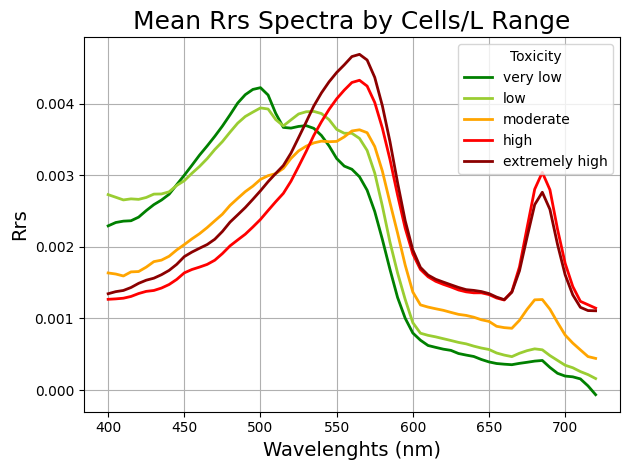

In [14]:
plt.figure(figsize=(10,6))
for label, row in rrs_mean_by_range.iterrows():
    plt.plot(wvs, row.values, label=str(label), color=toxicity_colors.get(label, 'gray'), linewidth=2)

plt.xlabel("Wavelenghts (nm)", size=14)
plt.ylabel("Rrs", size=14)
plt.title("Mean Rrs Spectra by Cells/L Range", size=18)
plt.legend(title="Toxicity")
plt.grid(True)
plt.tight_layout()
plt.show()